# Plot spatial data for 20CR
- 90-10th percentiles difference


In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

In [3]:
# define path where netcdsf of temperature are stored
path = '/g/data/w48/kb6999/20CR_TMP_seasonal_data_for_plots/'

need to export percenitles (without taking llm) from the members file (use read notebook) and then open them in this notebook

In [4]:
# open temperature percentiles 
p90_s_Glob = xr.open_dataset(f'{path}p90_s_Glob.nc')
p10_s_Glob = xr.open_dataset(f'{path}p10_s_Glob.nc')
p95_s_Glob = xr.open_dataset(f'{path}p95_s_Glob.nc')
p05_s_Glob = xr.open_dataset(f'{path}p05_s_Glob.nc')

In [5]:
# calculate the difference in percentiles between the 90th and 10th percentiles
p9010_Glob = p90_s_Glob - p10_s_Glob
p9505_Glob = p95_s_Glob - p05_s_Glob

In [6]:
# select out dates around kraktoa eruption 
K_mmm_p9010_Glob_r = p9010_Glob.sel(seasonyear = slice('1880','1990'))
K_mmm_p9505_Glob_r = p9505_Glob.sel(seasonyear = slice('1880','1990'))

In [8]:
# reverse the latitude axis so it goes from -90 to 90
K_mmm_p9010_Glob = K_mmm_p9010_Glob_r.reindex(lat=list(reversed(K_mmm_p9010_Glob_r.lat)))
K_mmm_p9505_Glob = K_mmm_p9505_Glob_r.reindex(lat=list(reversed(K_mmm_p9505_Glob_r.lat)))

In [9]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/w48/kb6999/20CR_data_netcdfs/land_20CR.nc')
landmask = landfrac_ds

In [10]:
# Select out SH and NH anomalies 
K_mmm_p9010_SH = K_mmm_p9010_Glob.sel(lat=slice(-90,0)) 
K_mmm_p9010_NH = K_mmm_p9010_Glob.sel(lat=slice(0,90)) 
# select out the Australian and E Australian anomalies 
K_mmm_p9010_Aus = K_mmm_p9010_Glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.LAND==1.0, drop=True)
K_mmm_p9010_EA = K_mmm_p9010_Glob.sel(lat=slice(-50,-5), lon=slice(140,155)).where(landmask.LAND==1.0, drop=True)

In [11]:
# Select out SH and NH anomalies 
K_mmm_p9505_SH = K_mmm_p9505_Glob.sel(lat=slice(-90,0)) 
K_mmm_p9505_NH = K_mmm_p9505_Glob.sel(lat=slice(0,90)) 
# select out the Australian and E Australian anomalies 
K_mmm_p9505_Aus = K_mmm_p9505_Glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.LAND==1.0, drop=True)
K_mmm_p9505_EA = K_mmm_p9505_Glob.sel(lat=slice(-50,-5), lon=slice(140,155)).where(landmask.LAND==1.0, drop=True)

In [12]:
K_mmm_p9010_Aus

<xarray.Dataset>
Dimensions:     (lat: 44, lon: 57, season: 2, seasonyear: 7)
Coordinates:
  * lat         (lat) float64 -43.16 -42.46 -41.75 ... -12.28 -11.58 -10.18
  * lon         (lon) float64 113.9 114.6 115.3 116.0 ... 151.8 152.6 153.3
  * season      (season) object 'DJF' 'JJA'
  * seasonyear  (seasonyear) int64 1880 1881 1882 1883 1884 1885 1886
Data variables:
    tmp         (seasonyear, season, lat, lon) float64 nan nan nan ... nan nan

## Figures

In [13]:
# dates and title for eruption and 3 times after
# K_dates winter
K_dates_w = [1883, 1884, 1885, 1886]
#K_dates_w = ['1883', '1884', '1885', '1886']
# K_dates_summer
K_dates_s = [1882, 1883, 1884, 1885]
#K_dates_s = ['1882', '1883', '1884', '1885']

In [14]:
# winter titles
titles_w = func.seasonal_title(K_dates_w, 'winter', 'JJA')
 # summer titles 
titles_s = func.seasonal_title(K_dates_s, 'summer', 'DJF')
titles_s

['summer prior to eruption, DJF 1882',
 '1st summer post-eruption, DJF 1883',
 '2nd summer post-eruption, DJF 1884',
 '3rd summer post-eruption, DJF 1885']

In [15]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [16]:
# set the mod max for the colour bars
cmax_tmp = [0,4]
cmax_pr = 0.5

### 95th minus 5th percentile

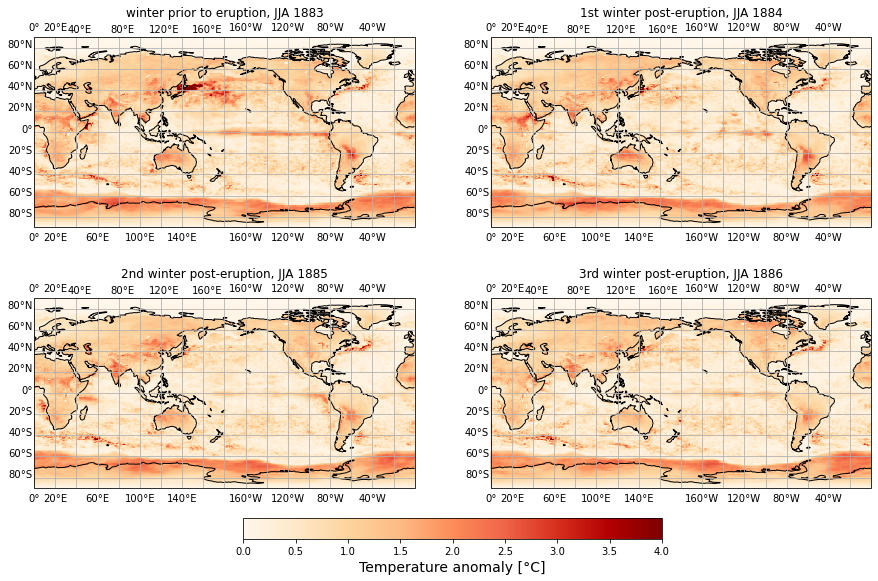

In [20]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_p9505_Glob.tmp.sel(season='JJA'), cmax_tmp, K_dates_w, titles_w, 'OrRd', f'Temperature anomaly [{deg}C]',0)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_JJA_p9505_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

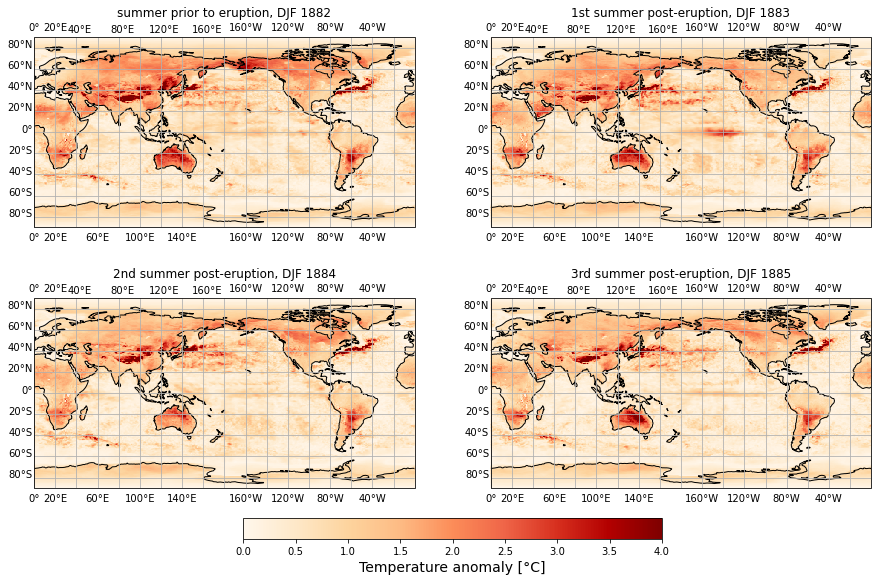

In [19]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_p9505_Glob.tmp.sel(season='DJF'), cmax_tmp, K_dates_s, titles_s, 'OrRd', f'Temperature anomaly [{deg}C]', 0)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_DJF_p9505_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

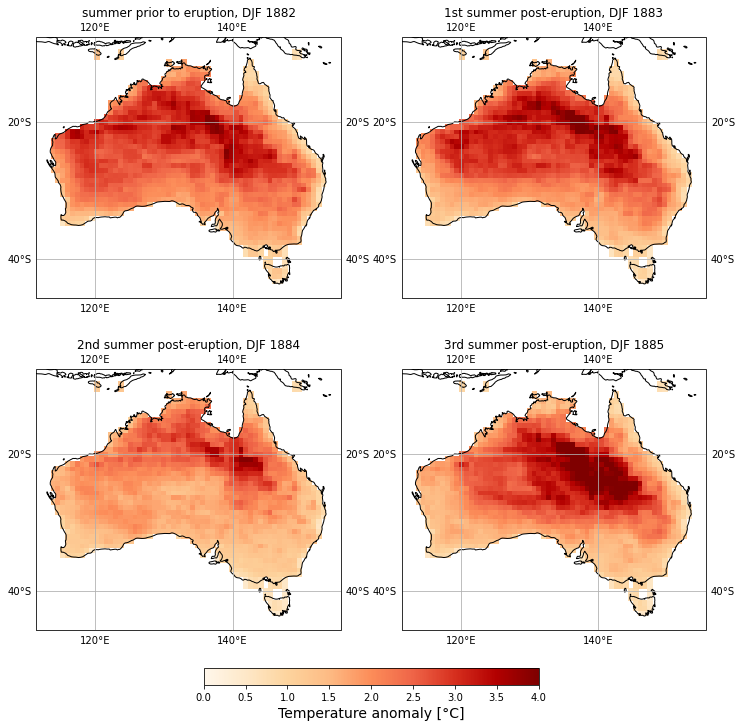

In [21]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_p9505_Aus.tmp.sel(season='DJF'), cmax_tmp, K_dates_s, titles_s, 'OrRd', f'Temperature anomaly [{deg}C]', 0)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_DJF_p9505_Aus.png', dpi=300, bbox_inches='tight')

### 90th minus 10th percentile

In [43]:
cmax_tmp = [0,2.5]

In [ ]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_p9010_Glob.tmp.sel(season='JJA'), cmax_tmp, K_dates_w, titles_w, 'OrRd', f'Temperature anomaly [{deg}C]',0)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_JJA_p9010_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

In [ ]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_p9010_Glob.tmp.sel(season='DJF'), cmax_tmp, K_dates_s, titles_s, 'OrRd', f'Temperature anomaly [{deg}C]', 0)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_DJF_p9010_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

In [ ]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_p9010_Aus.tmp.sel(season='JJA'), cmax_tmp, K_dates_w, titles_w, 'OrRd', f'Temperature anomaly [{deg}C]', 0)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_JJA_p9010_Aus.png', dpi=300, bbox_inches='tight')

In [ ]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_p9010_Aus.tmp.sel(season='DJF'), cmax_tmp, K_dates_s, titles_s, 'OrRd', f'Temperature anomaly [{deg}C]', 0)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_DJF_p9010_Aus.png', dpi=300, bbox_inches='tight')